In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [85]:
eval_dir = Path("/Users/michaeldoherty/git/vone_drl/eval")
nsc_ksp_fdl = eval_dir / "nsc_ksp_fdl_df.csv"
nodes = eval_dir / "agent_nodes_masked.csv"
paths = eval_dir / "agent_routes_masked.csv"
combined = eval_dir / "agent_4ampum3d.csv"
#combined = eval_dir / "agent_54rktcd5.csv"

In [86]:
df_heur = pd.read_csv(nsc_ksp_fdl)
df_nodes = pd.read_csv(nodes)
df_paths = pd.read_csv(paths)
df_combined = pd.read_csv(combined)

def get_blocking(col):
    blocking = (10 - col)*10
    return blocking
def get_blocking_std(col):
    return col*10
def replace_blocking_cols(df):
    df["blocking"] = get_blocking(df["reward"])
    df["blocking_std"] = get_blocking_std(df["std"])

replace_blocking_cols(df_nodes)
replace_blocking_cols(df_paths)
replace_blocking_cols(df_heur)
replace_blocking_cols(df_combined)
df_combined

,Unnamed: 0,load,reward,std,blocking,blocking_std
0,0,1,9.994000,0.005888,0.060000,0.058878
1,1,2,9.980000,0.001633,0.200000,0.016330
2,2,3,9.915333,0.008994,0.846667,0.089938
3,3,4,9.804000,0.004899,1.960000,0.048990
4,4,5,9.547333,0.054707,4.526667,0.547073
5,5,6,9.237333,0.058976,7.626667,0.589765
6,6,7,8.949333,0.057419,10.506667,0.574185
7,7,8,8.546667,0.110349,14.533333,1.103489
8,8,9,7.998667,0.071560,20.013333,0.715604
9,9,10,7.735333,0.104260,22.646667,1.042604


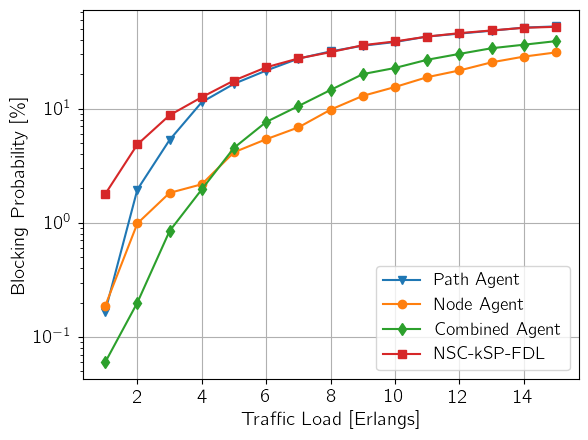

In [87]:
from matplotlib import rc
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')

plt.plot(df_paths["load"], df_paths["blocking"], label = "Path Agent", marker = 'v')
plt.plot(df_nodes["load"], df_nodes["blocking"], label = "Node Agent", marker='o')
plt.plot(df_combined["load"], df_combined["blocking"], label = "Combined Agent", marker="d")
plt.plot(df_heur["load"], df_heur["blocking"], label = "NSC-kSP-FDL", marker="s")


plt.legend()
plt.ylabel(r"Blocking Probability [\%]")
plt.xlabel("Traffic Load [Erlangs]")
plt.yscale("log")
plt.grid(True)
plt.show()

In [73]:
node_train = eval_dir / "node_training.csv"
path_train = eval_dir / "path_training.csv"
combined_train = eval_dir / "combined_training.csv"
node_train_df = pd.read_csv(node_train)
path_train_df = pd.read_csv(path_train)
combined_train_df = pd.read_csv(combined_train)
node_train_df

,Step,acceptance_ratio,acceptance_ratio__MIN,acceptance_ratio__MAX
0,1,0.6798,0.6798,0.6798
1,2,0.7962,0.7962,0.7962
2,3,0.8102,0.8102,0.8102
3,4,0.8294,0.8294,0.8294
4,5,0.8184,0.8184,0.8184
5,6,0.7892,0.7892,0.7892
6,7,0.7980,0.7980,0.7980
7,8,0.8108,0.8108,0.8108
8,9,0.8232,0.8232,0.8232
9,10,0.8024,0.8024,0.8024


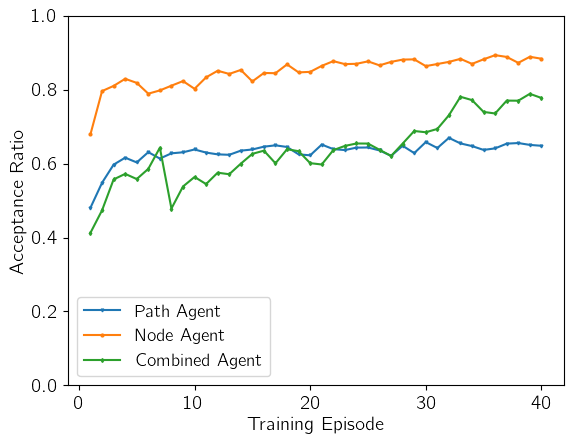

In [84]:
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)
rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.plot(path_train_df["Step"], path_train_df["acceptance_ratio"], label = "Path Agent", marker = 'v', markersize=2)
plt.plot(node_train_df["Step"], node_train_df["acceptance_ratio"], label = "Node Agent", marker="o", markersize=2)
plt.plot(combined_train_df["Step"][:40], combined_train_df["acceptance_ratio"][:40], label = "Combined Agent", marker = 'd', markersize=2)


plt.legend()
plt.ylabel("Acceptance Ratio")
plt.xlabel("Training Episode")
#plt.grid(True)
plt.ylim(0,1)
plt.show()